In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

[179 176 134  31  63 199 170   7  22  79 220 193  91 197  79 111  43 213
 154  30 245 205  35  62 196 114 236 208  19  44 130 225  42 145  98 204
 138 165 224 146 128 158 145 174 186 232 254  24  99  43 242  84  42 141
  15 191 134 232 174 226 109  49 148 117]


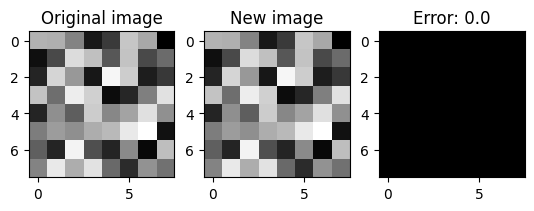

┌───┐ ░                     ┌───┐ ░                ┌───┐      ░ »
intensity_0: ┤ I ├─░─────────────────────┤ X ├─░────────────────┤ X ├──────░─»
             ├───┤ ░                     └─┬─┘ ░                └─┬─┘      ░ »
intensity_1: ┤ I ├─░───────────────────────┼───░──────────────────┼────────░─»
             ├───┤ ░                ┌───┐  │   ░           ┌───┐  │        ░ »
intensity_2: ┤ I ├─░────────────────┤ X ├──┼───░───────────┤ X ├──┼────────░─»
             ├───┤ ░           ┌───┐└─┬─┘  │   ░      ┌───┐└─┬─┘  │        ░ »
intensity_3: ┤ I ├─░───────────┤ X ├──┼────┼───░──────┤ X ├──┼────┼────────░─»
             ├───┤ ░           └─┬─┘  │    │   ░      └─┬─┘  │    │        ░ »
intensity_4: ┤ I ├─░─────────────┼────┼────┼───░────────┼────┼────┼────────░─»
             ├───┤ ░             │    │    │   ░        │    │    │        ░ »
intensity_5: ┤ I ├─░─────────────┼────┼────┼───░────────┼────┼────┼────────░─»
             ├───┤ ░      ┌───┐  │    │    │   ░        │    │    │        ░ »
intensity_6: ┤ I ├─░──────┤ X ├──┼────┼────┼───░────────┼────┼────┼────────░─»
             ├───┤ ░ ┌───┐└─┬─┘  │    │    │   ░        │    │    │        ░ »
intensity_7: ┤ I ├─░─┤ X ├──┼────┼────┼────┼───░────────┼────┼────┼────────░─»
             ├───┤ ░ └─┬─┘  │    │    │    │   ░        │    │    │        ░ »
      idx_0: ┤ H ├─░───■────■────■────■────■───░────────■────■────■────────░─»
             ├───┤ ░   │    │    │    │    │   ░        │    │    │        ░ »
      idx_1: ┤ H ├─░───■────■────■────■────■───░────────■────■────■────────░─»
             ├───┤ ░   │    │    │    │    │   ░        │    │    │        ░ »
      idx_2: ┤ H ├─░───■────■────■────■────■───░────────■────■────■────────░─»
             ├───┤ ░   │    │    │    │    │   ░        │    │    │        ░ »
      idx_3: ┤ H ├─░───■────■────■────■────■───░────────■────■────■────────░─»
             ├───┤ ░   │    │    │    │    │   ░        │    │    │        ░ »
      idx_4: ┤ H ├─░───■────■────■────■────■───░────────■────■────■────────░─»
             ├───┤ ░   │    │    │    │    │   ░ ┌───┐  │    │    │  ┌───┐ ░ »
      idx_5: ┤ H ├─░───■────■────■────■────■───░─┤ X ├──■────■────■──┤ X ├─░─»
             └───┘ ░                           ░ └───┘               └───┘ ░ »
    meas: 14/════════════════════════════════════════════════════════════════»
                                                                             »
«                            ┌───┐      ░                                    »
«intensity_0: ───────────────┤ X ├──────░────────────────────────────────────»
«                            └─┬─┘      ░                                    »
«intensity_1: ─────────────────┼────────░────────────────────────────────────»
«                              │        ░                                    »
«intensity_2: ─────────────────┼────────░────────────────────────────────────»
«                              │        ░                          ┌───┐     »
«intensity_3: ─────────────────┼────────░──────────────────────────┤ X ├─────»
«                              │        ░                     ┌───┐└─┬─┘     »
«intensity_4: ─────────────────┼────────░─────────────────────┤ X ├──┼───────»
«                       ┌───┐  │        ░                ┌───┐└─┬─┘  │       »
«intensity_5: ──────────┤ X ├──┼────────░────────────────┤ X ├──┼────┼───────»
«                  ┌───┐└─┬─┘  │        ░           ┌───┐└─┬─┘  │    │       »
«intensity_6: ─────┤ X ├──┼────┼────────░───────────┤ X ├──┼────┼────┼───────»
«                  └─┬─┘  │    │        ░      ┌───┐└─┬─┘  │    │    │       »
«intensity_7: ───────┼────┼────┼────────░──────┤ X ├──┼────┼────┼────┼───────»
«                    │    │    │        ░      └─┬─┘  │    │    │    │       »
«      idx_0: ───────■────■────■────────░────────■────■────■────■────■───────»
«                    │    │    │        ░        │    │    │    │    │       »
«      idx_1: ───────■────■────■────────░────────■────■────■───

In [5]:

# Create a 8x8 image with random values
image = np.random.randint(0, 255, (8, 8))

#image = (image*255).astype(int)


# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(6, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx)

num_qubits = qc_image.num_qubits

# Encode the image

for idx_ in range(intensity.size):
    qc_image.i(idx_)

for idx_ in range(idx.size):
    qc_image.h(idx_ + intensity.size)

qc_image.barrier()

image_ = image.reshape(-1)

print(image_)

for i, value in enumerate(image_):
    # Convert the value to binary string
    i_ = format(i, '06b')
    value_ = format(value, '08b')
    for idx, px_value in enumerate(i_[::-1]):
        if(px_value=='1'):
            qc_image.x(num_qubits-(idx+1))
    for idx, px_value in enumerate(value_[::-1]):
        if(px_value=='1'):
            qc_image.mcx([num_qubits-1, num_qubits-2, num_qubits-3, num_qubits-4, num_qubits-5, num_qubits-6], num_qubits-(idx+7))
    for idx, px_value in enumerate(i_[::-1]):
        if(px_value=='1'):
            qc_image.x(num_qubits-(idx+1))
    qc_image.barrier()

qc_image.measure_all()

backend = Aer.get_backend('aer_simulator')
result = execute(qc_image, backend).result()

counts = result.get_counts(qc_image)
list_counts = list(counts.keys())

# Create a new image from the results of the quantum circuit
new_image = np.zeros((64))
for value in list_counts:
    # Get the pixel position
    idx = int(value[0:6][::-1], 2)
    # Get the pixel value
    intensity = int(value[6:14][::-1], 2)
    # Set the pixel value
    new_image[idx] = intensity

# Reshape the image
new_image = new_image.reshape((8, 8))

# Flip the image in x axis and in y axis
new_image = np.flip(new_image, axis=0)
new_image = np.flip(new_image, axis=1)

error = np.sum(abs(image - new_image))
# Show the original and the new image in same plot with title (and the error between them)
plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('New image')
plt.imshow(new_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Error: {}'.format(error))
plt.imshow(abs(image - new_image), cmap='gray')
plt.show()

#print(list(counts.keys()))

# Draw the circuit
qc_image.draw()